In [69]:
from sklearn import linear_model
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, clf_score
from sklearn.linear_model import Ridge, Lasso
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ImportError: cannot import name 'clf_score'

In [22]:
fulldataset = pd.read_csv('./Data/fulldataset.csv')

fulldataset =fulldataset.dropna()
fulldataset.head()

,Unnamed: 0,Name,gender,CJWR,ES,FW_LFH,LF_FH,MEH,PAR,WHR,bmi
0,0,img_1293.bmp,Male,1.136545,45.174139,1.227986,0.351452,35.964674,0.020189,1.954599,46.512287
1,1,img_3398.bmp,Female,1.194400,49.721947,1.200236,0.496433,37.074287,0.020724,1.985043,30.406574
2,2,img_2851.bmp,Female,1.376229,51.382779,1.566994,0.306596,53.638591,0.018087,2.012835,30.948639
3,3,img_3493.bmp,Female,1.424883,30.694998,1.614011,0.308357,26.537562,0.032693,2.022035,35.870850
4,4,img_1914.bmp,Male,1.144129,19.556742,1.428383,0.488959,12.183614,0.043385,2.061823,33.507600


In [17]:
def normalize(data):
    dataNorm=((data-data.min())/(data.max()-data.min()))
    dataNorm["bmi"]=data["bmi"]
    return dataNorm

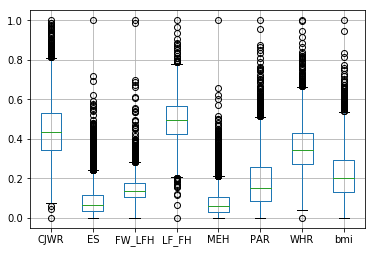

In [36]:
fulldataset.min()
Data = fulldataset.drop(columns ={'Unnamed: 0','Name', 'gender'})
Data.head()

scaleddata= (Data-Data.min())/(Data.max()-Data.min())
scaleddata.boxplot()

In [37]:
# scaleddata['bmi'] = Data['bmi']
# scaleddata.boxplot()

In [65]:
## Splitting data into two 
traindata , validationdata = train_test_split(scaleddata, test_size=0.2, random_state=40)

traindata.describe()

# validationdata.describe()

# columns = list(traindata)
# columns

traindata = traindata.dropna()
validationdata = validationdata.dropna()


X = scaleddata[['CJWR', 'ES', 'FW_LFH', 'LF_FH', 'MEH', 'PAR', 'WHR']]
Y = scaleddata['bmi']
X_train = traindata[['CJWR', 'ES', 'FW_LFH', 'LF_FH', 'MEH', 'PAR', 'WHR']]
y_train = traindata['bmi']

X_test = validationdata[['CJWR', 'ES', 'FW_LFH', 'LF_FH', 'MEH', 'PAR', 'WHR']]
y_test = validationdata['bmi']


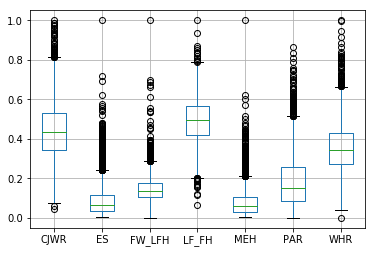

In [66]:
X_train.boxplot()

In [49]:

def calc_train_error(X_train, y_train, model):
    '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return mse
    
def calc_validation_error(X_test, y_test, model):
    '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return mse
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
    '''fits model and returns the RMSE for in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [50]:
lr = linear_model.LinearRegression(fit_intercept=True)

train_error, test_error = calc_metrics(X_train, y_train, X_test, y_test, lr)
train_error, test_error = round(train_error, 3), round(test_error, 3)

print('train error: {} | test error: {}'.format(train_error, test_error))
print('train/test: {}'.format(round(test_error/train_error, 1)))

train error: 0.012 | test error: 0.012
train/test: 1.0


In [51]:
## splitting traindata into train and validation
X_train, X_validation, y_train, y_validation = train_test_split(X_train,
                                                                y_train,
                                                                shuffle=False,
                                                                test_size=0.25,
                                                                random_state=2018)

In [52]:
print('train: {}% | validation: {}% | test {}%'.format(round(len(y_train)/len(Y),2),
                                                       round(len(y_validation)/len(Y),2),
                                                       round(len(y_test)/len(Y),2)))

train: 0.6% | validation: 0.2% | test 0.2%


In [53]:
alphas = [0.001, 0.01, 0.1, 1, 10]
print('All errors are RMSE')
print('-'*76)
for alpha in alphas:
    # instantiate and fit model
    ridge = Ridge(alpha=alpha, fit_intercept=True, random_state=99)
    ridge.fit(X_train, y_train)
    # calculate errors
    new_train_error = mean_squared_error(y_train, ridge.predict(X_train))
    new_validation_error = mean_squared_error(y_validation, ridge.predict(X_validation))
    new_test_error = mean_squared_error(y_test, ridge.predict(X_test))
    # print errors as report
    print('alpha: {:7} | train error: {:5} | val error: {:6} | test error: {}'.
          format(alpha,
                 round(new_train_error,3),
                 round(new_validation_error,3),
                 round(new_test_error,3)))

All errors are RMSE
----------------------------------------------------------------------------
alpha:   0.001 | train error: 0.012 | val error:  0.011 | test error: 0.012
alpha:    0.01 | train error: 0.012 | val error:  0.011 | test error: 0.012
alpha:     0.1 | train error: 0.012 | val error:  0.011 | test error: 0.012
alpha:       1 | train error: 0.012 | val error:  0.011 | test error: 0.012
alpha:      10 | train error: 0.012 | val error:  0.011 | test error: 0.012


In [54]:
from sklearn.model_selection import cross_val_score

alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1]

val_errors = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha, fit_intercept=True, random_state=77)
    errors = np.sum(-cross_val_score(lasso, 
                                     X, 
                                     y=Y, 
                                     scoring='neg_mean_squared_error', 
                                     cv=10, 
                                     n_jobs=-1))
    val_errors.append(np.sqrt(errors))


    
# RMSE
print(val_errors)
print('best alpha: {}'.format(alphas[np.argmin(val_errors)]))

[0.3466516936868905, 0.35048582075221363, 0.38526846319026486, 0.38526846319026486, 0.38526846319026486, 0.38526846319026486]
best alpha: 0.0001


In [57]:

from sklearn.model_selection import KFold

# K = 10
# kf = KFold(n_splits=K, shuffle=True, random_state=42)

# for alpha in alphas:
#     train_errors = []
#     validation_errors = []
#     for train_index, val_index in kf.split(X, Y):
        
#         # split data
#         X_train, X_val = X[train_index], Y[val_index]
#         y_train, y_val = X[train_index], Y[val_index]

#         # instantiate model
#         lasso = Lasso(alpha=alpha, fit_intercept=True, random_state=77)
        
#         #calculate errors
#         train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, lasso)
        
#         # append to appropriate list
#         train_errors.append(train_error)
#         validation_errors.append(val_error)
    
#     # generate report
#     print('alpha: {:6} | mean(train_error): {:7} | mean(val_error): {}'.
#           format(alpha,
#                  round(np.mean(train_errors),4),
#                  round(np.mean(validation_errors),4)))

In [58]:



regr = linear_model.LinearRegression()
model = regr.fit(X_train, y_train)

print(model.predict(X_test)[0:5])

[0.23758248 0.22674635 0.25361444 0.3389987  0.31658736]


In [71]:

validationdata.head()
y_pred = regr.predict(X_test)


print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

accuracy = regr.score(X_test, y_pred)
print('Accuracy metric:', accuracy)
# Plot outputs
# plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
# plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

# plt.xticks(())
# plt.yticks(())

# plt.show()

# from sklearn.model_selection import KFold # import KFold

# kf = KFold(n_splits=4) # Define the split - into 2 folds 
# kf.get_n_splits(x_test) # returns the number of splitting iterations in the cross-validator
# print(kf) 
# # KFold(n_splits=2, random_state=None, shuffle=False)

# for train_index, test_index in kf.split(X):
    
#     print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = Y[train_index], Y[test_index]
#     ('TRAIN:', array([2, 3]), 'TEST:', array([0, 1]))
#     ('TRAIN:', array([0, 1]), 'TEST:', array([2, 3]))

Coefficients: 
 [-0.15536842  0.28683765  0.13864725  0.03523146 -0.11141234 -0.0131423
  0.32600799]
Mean squared error: 0.01
Variance score: 0.14
Accuracy metric: 1.0
